In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Train dataset
train=pd.read_csv('train (2).csv')

In [3]:
# Test dataset
test=pd.read_csv('test (2).csv')

In [4]:
# Combining the train and test into a new dataframe
df=pd.concat([train,test],ignore_index=True)

In [5]:
# First five rows of the combined data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Shape of the data
df.shape

(1309, 12)

In [7]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
# Corelation matrix
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


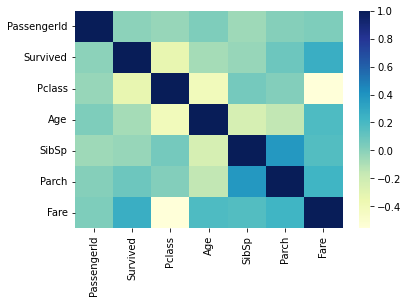

In [10]:
# Heatmap for the correlation matrix
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [11]:
# Checking for missing values
df.isnull().sum().sort_values()
# Data has missing values

PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Embarked          2
Age             263
Survived        418
Cabin          1014
dtype: int64

# Univariate Analysis

In [12]:
# We would first extract all the numerical columns
df.select_dtypes(np.number).drop(columns=['PassengerId','Survived','Pclass']).columns

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
nums=['Age', 'SibSp', 'Parch', 'Fare'] # All the numerical columns

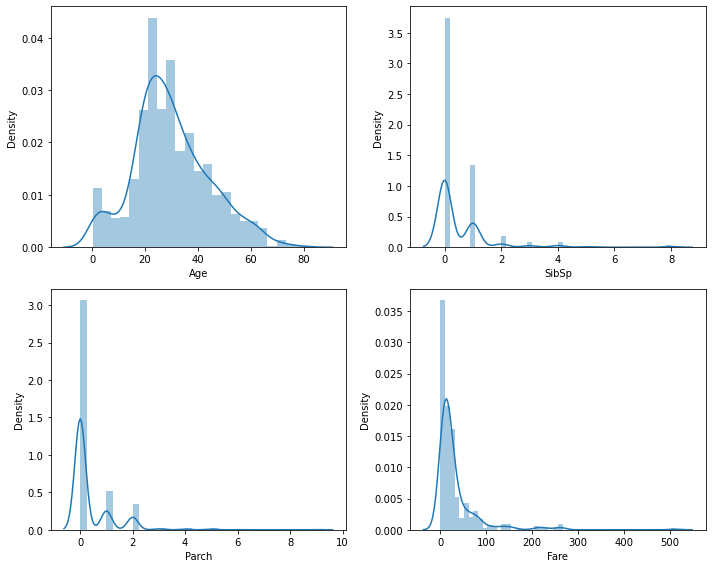

In [14]:
# Making multiple distribution plots for Univariate analysis of the numerical columns
rows=2
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.distplot(df[i])
    counter+=1
    
plt.tight_layout()
plt.show()

In [15]:
# Now we see the categorical variables
cats=['Survived','Pclass','Sex','Embarked']

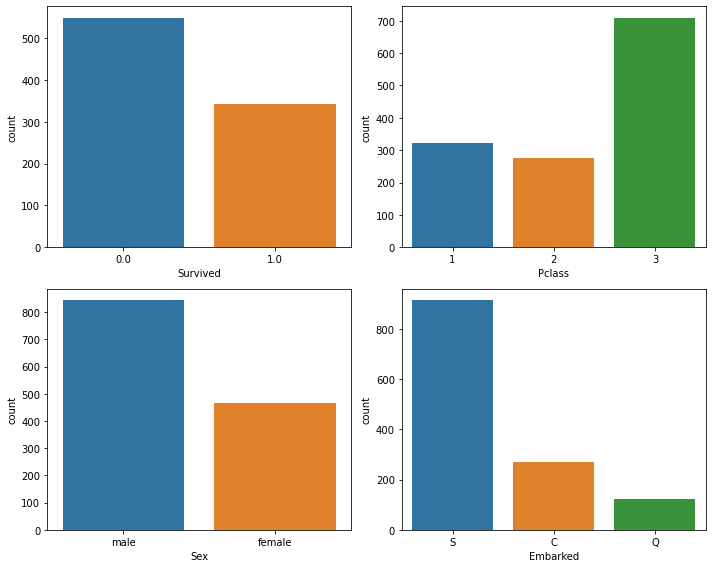

In [16]:
# Now we will make multiple countplots for univariate analysis of the categorical variable
rows=2
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in cats:
    plt.subplot(rows,cols,counter)
    sns.countplot(df[i])
    counter+=1
plt.tight_layout()
plt.show()

## Insights from the Univariate Analysis

* The Age column seems to be the nearest to a normal distribution
* Most of the people embarked were in the rangeb of 20 and 40
* Most poeple were travelinng alone or were travelling with 1 person
* Most people travelling didn't have any children with them or had 1 child with them
* The fare was mostly between 0 and 100 pounds
* People with 0 fare could be crew members
* A lot less people survived than people who died
* There were more passengers with in 3rd passenger class than any other passenger class
* There were more males than females on the ship. This could indicate that more males died on the ship than females
* Most people on the ship embarked from Southampton. This could mean that most of the people who died were from Southampton

In [17]:
# Before procedding on with our bivariate analysis
# We would do some feature engineering
# Handle our missing values
# Drop some redundant columns

# Feature Engineering, and Handling of Missing values

In [18]:
# The first feature that we would engineer are the Sibsp and parch column
# What we would do is that we will add these two columns and add 1 to it to take into account the number of people travelling together
df['FamilyMembers']=df.SibSp+df.Parch+1
# We have now created our new feature

In [19]:
# Since FamilyMembers column is serving our purpose
# we will drop the SibSp and Parch columns
df.drop(columns=['SibSp','Parch'],inplace=True)# Both the columns are now dropped

In [20]:
# We can see that there are some categorical columns that are of integer type
# We would change them to object
df.Pclass=df.Pclass.astype('object')

In [21]:
# We would be dropping the passenger id and ticket column because we feel they are redundant
df.drop(columns=['PassengerId','Ticket'],inplace=True)

In [22]:
# In terms of missing values
# We will first handle the cabin column
# In this we would also bin the column in two categories:- 'Cabin alloted' and 'Cabin not alloted'
# For this we would replace the non null entries with 'Cabin alloted'
# And we will fill the null entries with 'Cabin Not-alloted'
df.loc[df.Cabin.isnull()==False,'Cabin']='Cabin Alloted'
df.Cabin.fillna('Cabin not alloted',inplace=True)

In [23]:
df.isnull().sum()
# We can see that there are 1 and 2 null values in Fare and Embarked respectively
# We would use mean imputation and mode imputation to fill them up

Survived         418
Pclass             0
Name               0
Sex                0
Age              263
Fare               1
Cabin              0
Embarked           2
FamilyMembers      0
dtype: int64

In [24]:
df.Fare.fillna(df.Fare.mean(),inplace=True)
df.Embarked.fillna(df.Embarked.mode().values[0],inplace=True)

In [25]:
df.isnull().sum()
# Now only the age column has null values
# Before filling that we would be doing feature engineering to extract the title from the names of the people(this is why we didn't drop the colum yet)
# Then we would fill the null values in age according to the Pclass and title

Survived         418
Pclass             0
Name               0
Sex                0
Age              263
Fare               0
Cabin              0
Embarked           0
FamilyMembers      0
dtype: int64

In [26]:
# Splitting the name columns in two halves
df[['delete','work']]=df.Name.str.split(', ',expand=True)

In [27]:
# Since we have the column where we can easily extract the title we would drop the 'delete' column and the 'Name' column
df.drop(columns=['Name','delete'],inplace=True)

In [28]:
# We would now separate titles from the name
lst=[]
for x in df.work:
    lst.append(x.split('. ')[0])
# Now since our list of title is created we would create a new feature 'Title' and put the list that we got as the column
df['Title']=lst #Title column is now created

In [29]:
# Dropping extra columns that we don't need
df.drop(columns=['work'],inplace=True)

In [30]:
# Now we would proceed to filling null values in age column
# First we will see the unique values in Title column
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [31]:
# Now we would create a list where we would keep all those titles where we would like bin them as others
# We would keep the primary titles like 'Mr','Mrs','Master',etc. intact while all the other title would fall under a bin 'Others'
others=[ 'Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']

In [32]:
# Now we would create a function to place the titles under the bins according to the list we created above
def title_bin(x):
    if x in others:
        return 'Others'
    else:
        return x
df.Title=df.Title.apply(title_bin) # Binning the title column

In [33]:
# We would fill the age column by groupwise median imputation according to title and pclass
# First we would find the median age for each title in each class
pd.DataFrame(df.groupby(['Title','Pclass'])['Age'].median())

Age
Title  Pclass      
Master 1        6.0
       2        2.0
       3        6.0
Miss   1       30.0
       2       20.0
       3       18.0
Mr     1       41.5
       2       30.0
       3       26.0
Mrs    1       45.0
       2       30.5
       3       31.0
Ms     2       28.0
       3        NaN
Others 1       47.0
       2       41.5

In [34]:
# Now we would do the groupwise median imputation
df.loc[((df["Title"]=="Master") & (df["Pclass"]==1)) & (df["Age"].isnull()),"Age"]=6.0
df.loc[((df["Title"]=="Master") & (df["Pclass"]==2)) & (df["Age"].isnull()),"Age"]=2.0
df.loc[((df["Title"]=="Master") & (df["Pclass"]==3)) & (df["Age"].isnull()),"Age"]=6.0
df.loc[((df["Title"]=="Miss") & (df["Pclass"]==1)) & (df["Age"].isnull()),"Age"]=30.0
df.loc[((df["Title"]=="Miss") & (df["Pclass"]==2)) & (df["Age"].isnull()),"Age"]=20.0
df.loc[((df["Title"]=="Miss") & (df["Pclass"]==3)) & (df["Age"].isnull()),"Age"]=18.0
df.loc[((df["Title"]=="Mr") & (df["Pclass"]==1)) & (df["Age"].isnull()),"Age"]=41.5
df.loc[((df["Title"]=="Mr") & (df["Pclass"]==2)) & (df["Age"].isnull()),"Age"]=30.0
df.loc[((df["Title"]=="Mr") & (df["Pclass"]==3)) & (df["Age"].isnull()),"Age"]=26.0
df.loc[((df["Title"]=="Mrs") & (df["Pclass"]==1)) & (df["Age"].isnull()),"Age"]=45.0
df.loc[((df["Title"]=="Mrs") & (df["Pclass"]==2)) & (df["Age"].isnull()),"Age"]=30.5
df.loc[((df["Title"]=="Mrs") & (df["Pclass"]==3)) & (df["Age"].isnull()),"Age"]=31.0
df.loc[(df["Title"]=="Ms") &  (df["Age"].isnull()),"Age"]=28.0
df.loc[((df["Title"]=="Others") & (df["Pclass"]==1)) & (df["Age"].isnull()),"Age"]=47.0
df.loc[((df["Title"]=="Others") & (df["Pclass"]==2)) & (df["Age"].isnull()),"Age"]=41.5

In [35]:
df.isnull().sum() # Age column is also now filled

Survived         418
Pclass             0
Sex                0
Age                0
Fare               0
Cabin              0
Embarked           0
FamilyMembers      0
Title              0
dtype: int64

In [36]:
# Since our Data is now cleaned we can now proceed with our bivariate analysis

# Bivariate Analysis

In [37]:
# First we will start with the numerical features
df.select_dtypes(np.number).drop(columns='Survived').columns

Index(['Age', 'Fare', 'FamilyMembers'], dtype='object')

In [38]:
nums=['Age', 'Fare', 'FamilyMembers'] # Numerical features

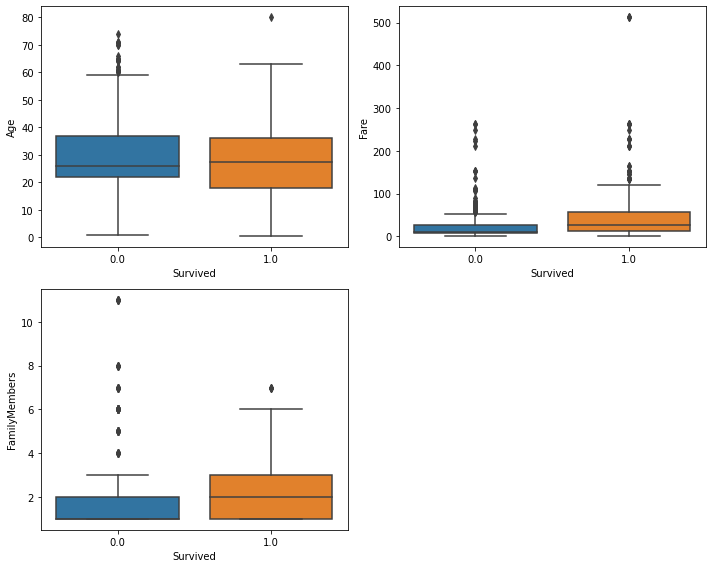

In [39]:
# Making multiple boxplots
rows=2
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,8]
for i in nums:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='Survived',y=i,data=df)
    counter+=1
plt.tight_layout()
plt.show()

In [40]:
# Now we will take the Categorical Features
df.select_dtypes(object).columns

Index(['Pclass', 'Sex', 'Cabin', 'Embarked', 'Title'], dtype='object')

In [41]:
cat=['Pclass', 'Sex', 'Cabin', 'Embarked', 'Title'] # All the categorical column

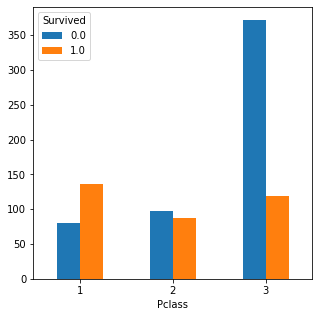

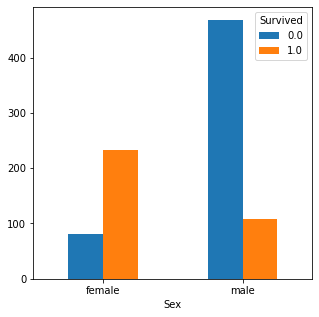

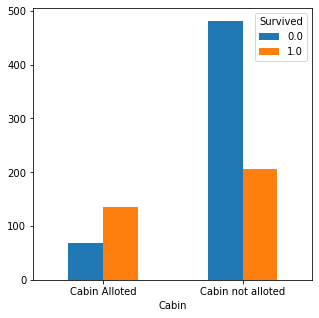

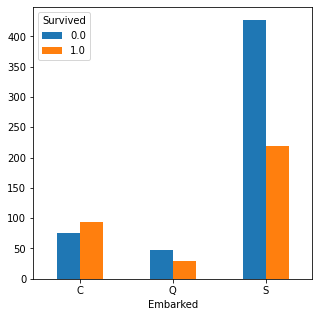

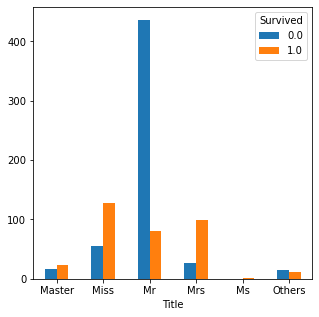

In [42]:
# Plotting multiple crosstabs as barplots
plt.rcParams['figure.figsize']=[5,5]
for i in cat:
    pd.crosstab(df[i],df.Survived).plot(kind='bar')
    plt.xticks(rotation=0)
    plt.show()

## Insights from the Bivariate Analysis

* Younger people had a higher chance of survival than older people
* People who paid higher fare had a considerable higher chance of survival
* People with higher number of family members travelling together had a considerably lower chance of survival
* People travelling in the first class seem to have a higher chance of surviving the disaster
* A ratio of males dying is a lot more than females not surviving the disaster
* A consider number of people died who were not alloted cabins than the people who were alloted cabins
* People dying from Southampton is considerbaly higher than people from Cherbough and Queenstown
* From the title barplot we can clearly see that the number of males dying was considerably higher than women and children

# Encoding, Splitting and Scaling of the data

In [43]:
# We would use the one hot encoding method and create dummy variables for the categorical columns
dummy=pd.get_dummies(df,drop_first=True)

In [44]:
# Now we will split the dummy dataframe into train and test
# Since already knew the size of train and test data
# we would use the iloc method to split the same
df_train=dummy.iloc[:891,:] # Train dummy data

In [45]:
df_test=dummy.iloc[891:,:] # Test dummy data

In [46]:
df_test.drop(columns='Survived',inplace=True) # Dropping the target variable from the test data

In [47]:
# Now we will scale the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df_train.iloc[:,1:4]=sc.fit_transform(df_train.iloc[:,1:4])
df_test.iloc[:,0:3]=sc.transform(df_test.iloc[:,0:3])

In [48]:
# Now initializing our X and Y variables in train and test data
x_train=df_train.drop(columns='Survived')
y_train=df_train.Survived
x_test=df_test

# Model Bulding

## Logistic Regression

In [49]:
# We will first use Logistic Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model=lg.fit(x_train,y_train)
y_test=model.predict(x_test)

In [50]:
prediction=pd.DataFrame(y_test,test.PassengerId).reset_index()

In [51]:
prediction.to_csv('gender_submission.csv')

## Decision Tree Classifier

In [52]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model=dt.fit(x_train,y_train)
y_test=model.predict(x_test)

In [53]:
prediction=pd.DataFrame(y_test,test.PassengerId).reset_index()

In [54]:
prediction.to_csv('gender_submissionDecisionTree.csv')

# Random Forrest

In [55]:
# Random Forrest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(x_train,y_train)
y_test=model.predict(x_test)

In [56]:
prediction=pd.DataFrame(y_test,test.PassengerId).reset_index()

In [57]:
prediction.to_csv('gender_submissionRandomForrest.csv')

# Light GBM

In [58]:
# LightGBM
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
model=lgb.fit(x_train,y_train)
y_test=model.predict(x_test)

In [59]:
prediction=pd.DataFrame(y_test,test.PassengerId).reset_index()

In [60]:
prediction.to_csv('gender_submissionLGBM.csv')